In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from object_detection.network.edgetpumodel import EdgeTPUModel
from object_detection.network.utils import plot_one_box, Colors, get_image_tensor, xyxy2xywh

In [8]:
img = cv2.imread('/home/pi/new_test/image_cn:0.png')
depth = cv2.imread('/home/pi/new_test/depth:0.png', cv2.IMREAD_GRAYSCALE)

In [11]:
heatmap = cv2.applyColorMap(depth, cv2.COLORMAP_HOT)

(480, 640, 3) (720, 1280)


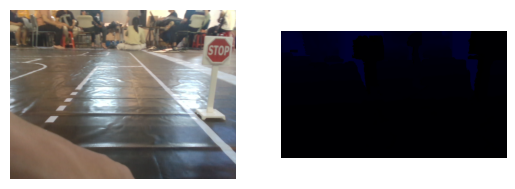

In [12]:
f, ax = plt.subplots(1,2)
ax[0].axis('off')
ax[0].imshow(img)
ax[1].axis('off')
ax[1].imshow(heatmap)
print(img.shape, depth.shape)

In [10]:
print(np.min(depth), np.max(depth))

0 19


In [6]:
model_path = "object_detection/weights/traffic_3.tflite"
names = "object_detection/data.yaml"
conf_thresh = 0.5
iou_thresh = 0.65
device = 0
        
model = EdgeTPUModel(model_path, names, conf_thresh=conf_thresh, iou_thresh=iou_thresh)        

INFO:EdgeTPUModel:Confidence threshold: 0.5
INFO:EdgeTPUModel:IOU threshold: 0.65
INFO:EdgeTPUModel:Loaded 7 classes
INFO:EdgeTPUModel:Successfully loaded /home/pi/BFMC_BKBuilder_Brain_ROS/src/perception/object_detection/weights/traffic_3.tflite


In [7]:
out = img
full_image, net_image, pad = get_image_tensor(img, 640) #Transform the image into tensors
pred = model.forward(net_image)
det = pred[0]
det[:, :4] = model.get_scaled_coords(det[:,:4], out, pad)

In [8]:
box = []
for *xyxy, conf, cls in reversed(det):
    print(xyxy)
    box.append(xyxy)
    label = f"Class:{model.names[int(cls)]}:{xyxy}"
    print(label)
    out = plot_one_box(xyxy, out, label=label)

[544.0, 80.0, 631.0, 154.0]
Class:Stop sign:[544.0, 80.0, 631.0, 154.0]


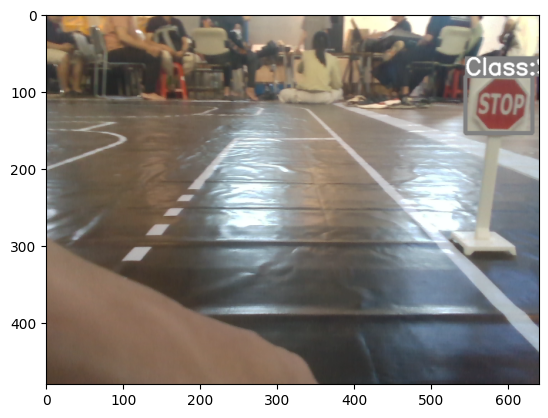

In [9]:
plt.imshow(out)

In [11]:
def crop_center(img,cropx,cropy):
    y,x = img.shape
    startx = x//2-(cropx//2)
    starty = y//2-(cropy//2)    
    return img[starty:starty+cropy,startx:startx+cropx]

[[20  0  0 ... 18 18 18]
 [ 0  0  0 ...  2  2  2]
 [ 0  0  0 ...  2  2  2]
 ...
 [ 2  2  2 ... 21 21 21]
 [ 2  2  2 ... 21 21 21]
 [ 2  2  2 ... 21 21 21]]
[[2 2]
 [2 2]]


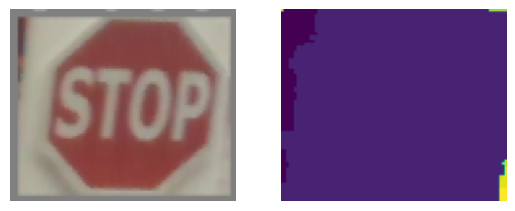

In [12]:
for i in range(len(box)):
    d = depth[int(box[i][1]):int(box[i][3]), int(box[i][0]):int(box[i][2])]
    d_ = crop_center(d, 2, 2)
    i = out[int(box[i][1]):int(box[i][3]), int(box[i][0]):int(box[i][2])]
    f, ax = plt.subplots(1,2)
    ax[0].axis('off')
    ax[0].imshow(i)
    ax[1].axis('off')
    ax[1].imshow(d)
    print(d)
    print(d_)

[[18 18]
 [18 18]]


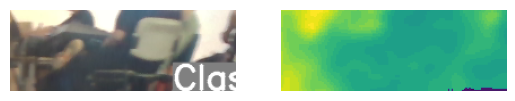

In [14]:
scale_x = 400
scale_x1 = 600
scale_y = 8
scale_y1 = 80
t_d = depth[scale_y:scale_y1, scale_x:scale_x1]
t_i = out[scale_y:scale_y1, scale_x:scale_x1 ]
f, ax = plt.subplots(1,2)
ax[0].axis('off')
ax[0].imshow(t_i)
ax[1].axis('off')
ax[1].imshow(t_d)
t_d_ = crop_center(t_d,2,2)
print(t_d_)